In [3]:
import numpy as np

X = np.random.rand(100, 2)
X = np.concatenate((X, (X[:, 0]**2 + X[:, 1]**2).reshape(-1, 1)), axis=1)
X = X - X.mean(axis=0)
U, S, Vt = np.linalg.svd(X)
V = Vt.T
print('Sigma', S)
print('V', V)

X_PCA = X.dot(V[:, :2])
print('Projection', X_PCA)


Sigma [4.53878994 3.05522974 0.56057447]
V [[-0.49129018  0.62439383 -0.60726131]
 [-0.28156371 -0.77362124 -0.56765488]
 [-0.82423045 -0.10790052  0.55587916]]
Projection [[-8.74427577e-01  5.32933872e-02]
 [-3.06756184e-01  3.65307539e-01]
 [ 1.32590986e-01 -2.05370257e-01]
 [-5.88686369e-01  1.16331885e-01]
 [-3.65572133e-03  4.52030975e-02]
 [ 1.84254889e-01  2.31266348e-01]
 [-2.82902880e-01  4.00151282e-01]
 [-6.03379366e-02 -4.71919059e-01]
 [-2.18215570e-02  4.24173614e-02]
 [ 2.68772936e-01  8.93659242e-02]
 [-1.30365080e-01 -3.61339923e-01]
 [ 1.12793989e-01 -4.36542084e-01]
 [-6.61257880e-01  2.12535707e-01]
 [ 1.55534475e-01 -6.62798183e-02]
 [-1.06821908e-01  4.52835256e-01]
 [ 8.87831226e-01  7.17848331e-02]
 [-1.49391229e-01 -2.33677521e-01]
 [ 1.61140666e-01  1.17408876e-01]
 [ 3.82562293e-01  3.32505521e-01]
 [ 3.92271440e-01  3.87389856e-02]
 [-3.87470979e-01  4.69571038e-02]
 [-1.62925308e-02 -6.20376258e-01]
 [-1.07473531e-01  2.81027818e-01]
 [ 8.65099563e-01  1.00

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_PCA = pca.fit_transform(X)
print(X_PCA)
print(pca.components_)
print(pca.explained_variance_ratio_)

[[ 8.74427577e-01 -5.32933872e-02]
 [ 3.06756184e-01 -3.65307539e-01]
 [-1.32590986e-01  2.05370257e-01]
 [ 5.88686369e-01 -1.16331885e-01]
 [ 3.65572133e-03 -4.52030975e-02]
 [-1.84254889e-01 -2.31266348e-01]
 [ 2.82902880e-01 -4.00151282e-01]
 [ 6.03379366e-02  4.71919059e-01]
 [ 2.18215570e-02 -4.24173614e-02]
 [-2.68772936e-01 -8.93659242e-02]
 [ 1.30365080e-01  3.61339923e-01]
 [-1.12793989e-01  4.36542084e-01]
 [ 6.61257880e-01 -2.12535707e-01]
 [-1.55534475e-01  6.62798183e-02]
 [ 1.06821908e-01 -4.52835256e-01]
 [-8.87831226e-01 -7.17848331e-02]
 [ 1.49391229e-01  2.33677521e-01]
 [-1.61140666e-01 -1.17408876e-01]
 [-3.82562293e-01 -3.32505521e-01]
 [-3.92271440e-01 -3.87389856e-02]
 [ 3.87470979e-01 -4.69571038e-02]
 [ 1.62925308e-02  6.20376258e-01]
 [ 1.07473531e-01 -2.81027818e-01]
 [-8.65099563e-01 -1.00237350e-01]
 [-7.11925978e-01  1.93043350e-01]
 [-7.66976034e-01  7.11098985e-02]
 [-6.07319752e-01 -3.86383786e-02]
 [ 8.14786078e-02  4.48221495e-01]
 [-5.17133685e-01 -4

In [5]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target']

In [6]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X)
print(X_pca.shape, pca.n_components_)

(70000, 154) 154


In [7]:
from sklearn.decomposition import IncrementalPCA

ipca = IncrementalPCA(n_components=pca.n_components_)

for batch in np.array_split(X, 100):
  ipca.partial_fit(batch)

X_pca = pca.transform(X)
print(X_pca.shape)

(70000, 154)


In [11]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components=154, kernel='rbf', gamma=0.04)
X_reduced = rbf_pca.fit_transform(X[:10000])
print(X_reduced)

[[ 0.00000000e+00 -0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [-3.11507208e-04 -1.83072480e-04  5.78661452e-04 ... -2.57257843e-06
   8.56280919e-05  2.92407528e-04]
 [ 9.62801293e-05  2.65741361e-05  5.11263505e-04 ...  7.26575007e-05
  -2.59468415e-04  3.72589481e-04]
 ...
 [-1.05223579e-03  6.14049412e-03  3.68513318e-03 ... -2.16001746e-04
   7.00605800e-06 -8.45361391e-04]
 [-1.02014300e-03  2.43719463e-03 -1.62560007e-04 ...  2.35505200e-04
  -9.98646970e-05  8.75476857e-04]
 [ 3.76458332e-03 -1.04060410e-03 -5.06933191e-03 ... -1.87791428e-03
  -1.22368628e-03  4.61671498e-03]]


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

kpca_pipe = Pipeline([
  ('kpca', KernelPCA()),
  ('log', LogisticRegression()),
])

param_grid = [{
  'kpca__n_components': np.linspace(5, 200, 20, dtype=np.int32),
  'kpca__kernel': ['linear', 'rbf', 'sigmoid'],
  'kpca__gamma': np.linspace(0.03, 0.05, 10),
  'log__multi_class': ['multinomial'],
}]

grid_search = GridSearchCV(kpca_pipe, param_grid=param_grid)
grid_search.fit(X[:100], y[:100])
print(grid_search.best_params_)

/Users/carlschader/programming/ml-tensorflow/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/carlschader/programming/ml-tensorflow/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

{'kpca__gamma': 0.03, 'kpca__kernel': 'linear', 'kpca__n_components': 35, 'log__multi_class': 'multinomial'}


In [15]:
from sklearn.metrics import confusion_matrix

kpca_best = grid_search.best_estimator_
print(confusion_matrix(y[100:2000], kpca_best.predict(X[100:2000])))

[[152   0   4   1   1  11   4   4   0   1]
 [  0 195   0   0   0   0   1   1   5   4]
 [  1  40  90   0  36   8   3  10   4   0]
 [  1  12  12 126   3  15   1   2   4   4]
 [  0   5   0   0 180   0   3   4   0  11]
 [ 12   3   3  43  18  69   9   5   8   5]
 [  2  14   2   1  21   4 140   4   0   1]
 [  0  10   4   0   6   1   0 163   0  30]
 [  3   9   9   8   7   6   2   1 101  18]
 [  2   2   0   5  67   0   0  26   1  96]]


In [21]:
from sklearn.metrics import mean_squared_error

# {'kpca__gamma': 0.03, 'kpca__kernel': 'linear', 'kpca__n_components': 35, 'log__multi_class': 'multinomial'}

params = {
  'gamma': grid_search.best_params_['kpca__gamma'],
  'kernel': grid_search.best_params_['kpca__kernel'],
  'n_components': grid_search.best_params_['kpca__n_components'],
  'fit_inverse_transform': True,
}

rbf_pca = KernelPCA(**params)
X_reduced = rbf_pca.fit_transform(X[:100])
X_reconstructed = rbf_pca.inverse_transform(X_reduced)
print(mean_squared_error(X_reconstructed, X[:100]))

3779.5484217669914


In [28]:
# param_grid = [{
#   'gamma': np.linspace(0.01, 0.1, 20),
#   'kernel': ['linear', 'rbf', 'sigmoid'],
#   'n_components': np.linspace(5, 200, 20, dtype=np.int32),
# }]

# kpca = KernelPCA(fit_inverse_transform=True)

# pipe = Pipeline([
#   ('kpca', kpca),
#   ('inverse', kpca.inverse_transform),
# ])

# # grid_search = GridSearchCV(KPCAGS(), param_grid=param_grid, scoring=mean_squared_error)
# # grid_search.fit(X[:100])

AttributeError: 'KPCAGS' object has no attribute 'gamma'

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7)
print(X_train.shape)

(60000, 784)


In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
print(accuracy_score(y_test, clf.predict(X_test)))

0.9675


In [41]:
pca = PCA(n_components=0.95)
pca.fit(X)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [42]:
clf_pca = RandomForestClassifier()
clf_pca.fit(X_train_pca, y_train)
print(accuracy_score(y_test, clf_pca.predict(X_test_pca)))

0.9434


In [2]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

/Users/carlschader/programming/ml-tensorflow/.venv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/carlschader/programming/ml-tensorflow/.venv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


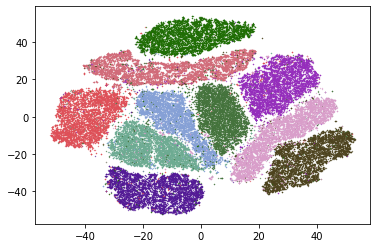

In [12]:
import matplotlib.pyplot as plt
import numpy as np

for i in range(10):
  indices = np.where(y == str(i))
  plt.scatter(X_tsne[indices, [0]], X_tsne[indices, [1]], color=np.random.rand(3,), s=0.1)
plt.show()